In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:\\Users\\admin\\Downloads\\clustervisitor.csv")
df.head()

,User_ID,Age,Gender,Location
0,1,25,Female,New York
1,2,40,Male,Los Angeles
2,3,22,Male,Chicago
3,4,55,Female,Houston
4,5,30,Male,Miami


In [5]:
cluster={"young":(df['Age']<=30),"Middle":((df['Age']>30)&(df['Age']<=60)),"Old":(df['Age']>50)}

In [6]:
cluster

{'young': 0      True
 1     False
 2      True
 3     False
 4      True
 5     False
 6      True
 7     False
 8     False
 9     False
 10    False
 11     True
 12    False
 13    False
 14     True
 15    False
 16    False
 17     True
 18    False
 19    False
 20    False
 21    False
 22    False
 23    False
 24    False
 25    False
 26    False
 27     True
 28    False
 29    False
 Name: Age, dtype: bool,
 'Middle': 0     False
 1      True
 2     False
 3      True
 4     False
 5      True
 6     False
 7      True
 8      True
 9      True
 10     True
 11    False
 12     True
 13     True
 14    False
 15     True
 16     True
 17    False
 18     True
 19     True
 20     True
 21     True
 22     True
 23     True
 24     True
 25     True
 26     True
 27    False
 28     True
 29     True
 Name: Age, dtype: bool,
 'Old': 0     False
 1     False
 2     False
 3      True
 4     False
 5     False
 6     False
 7     False
 8     False
 9     False
 10    False
 

In [8]:
count=[]
for g,c in cluster.items():
    visitor=df[c]
    count.append(len(visitor))
    print(f"Visitors in {g} group")
    print(visitor)
    print(count)

Visitors in young group
    User_ID  Age  Gender      Location
0         1   25  Female      New York
2         3   22    Male       Chicago
4         5   30    Male         Miami
6         7   28  Female        Boston
11       12   27    Male        Austin
14       15   29  Female  Philadelphia
17       18   26    Male   Minneapolis
27       28   24  Female    Sacramento
[8]
Visitors in Middle group
    User_ID  Age  Gender         Location
1         2   40    Male      Los Angeles
3         4   55  Female          Houston
5         6   45  Female    San Francisco
7         8   50    Male          Seattle
8         9   35    Male           Dallas
9        10   48  Female          Atlanta
10       11   33  Female  Washington D.C.
12       13   38    Male           Denver
13       14   42  Female          Phoenix
15       16   36    Male         Portland
16       17   51  Female          Detroit
18       19   31  Female        Charlotte
19       20   47    Male        San Diego
20      

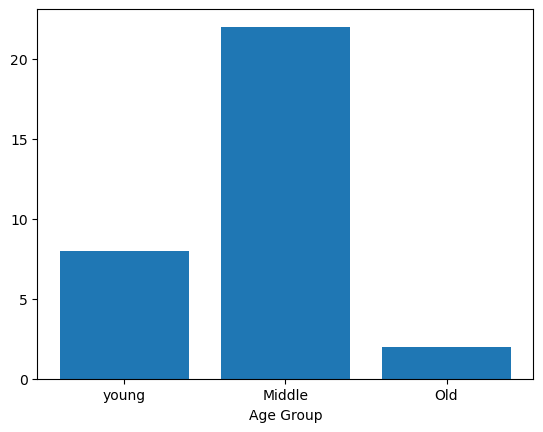

In [25]:
plt.bar(cluster.keys(),count,data=df)
plt.xlabel('Age Group')
plt.show()

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


    User_ID  Age  Gender         Location  Cluster
0         1   25  Female         New York        1
1         2   40    Male      Los Angeles        2
2         3   22    Male          Chicago        1
3         4   55  Female          Houston        0
4         5   30    Male            Miami        1
5         6   45  Female    San Francisco        0
6         7   28  Female           Boston        1
7         8   50    Male          Seattle        0
8         9   35    Male           Dallas        2
9        10   48  Female          Atlanta        0
10       11   33  Female  Washington D.C.        2
11       12   27    Male           Austin        1
12       13   38    Male           Denver        2
13       14   42  Female          Phoenix        2
14       15   29  Female     Philadelphia        1
15       16   36    Male         Portland        2
16       17   51  Female          Detroit        0
17       18   26    Male      Minneapolis        1
18       19   31  Female       

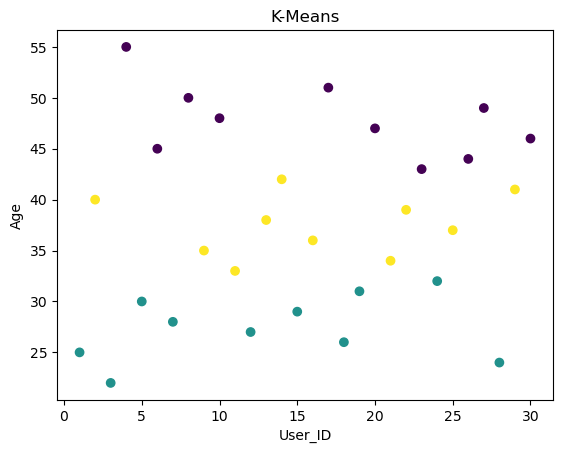

In [29]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Age']])
print(df)
plt.scatter(df['User_ID'], df['Age'], c=df['Cluster'])
plt.xlabel('User_ID')
plt.ylabel('Age')
plt.title('K-Means')
plt.show()